In [5]:

# normal 
import pandas as pd


# imports 
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster

# Geo-location stuffs
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [6]:
#!conda install -c conda-forge geojson

---

In [66]:
# loads in crash data

df = pd.read_csv('./data/crashes_lincoln_tunnel.csv')

In [67]:
df = gpd.GeoDataFrame(df, geometry = gpd.points_from_xy(df.LONGITUDE, df.LATITUDE))

In [9]:
# Creates sample crash data

#df = df.sample(2_000)

In [10]:
"""
    Creating Reduced Columns 

"""

# list of columns names

columns_names = list(df.columns)

#removing names of columns you want to KEEP

columns_names.remove('ZIP CODE')
columns_names.remove('BOROUGH')
columns_names.remove('LATITUDE')
columns_names.remove('LOCATION')
columns_names.remove('LONGITUDE')
columns_names.remove('CONTRIBUTING FACTOR VEHICLE 1')
columns_names.remove('CRASH TIME')
columns_names.remove('CRASH DATE')
columns_names.remove('date')
columns_names.remove('geometry')

#dropping the rest of the list 

df = df.drop(columns = columns_names, axis = 1)

In [68]:
df.head(2)

,Unnamed: 0,date,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,CONTRIBUTING FACTOR VEHICLE 1,geometry
0,80,2019-01-01,01/01/2019,4:50,MANHATTAN,10001.0,40.751026,-73.996620,"(40.751026, -73.99662)",Unspecified,POINT (-73.99662 40.75103)
1,87,2019-01-01,01/01/2019,4:23,NaN,NaN,40.761500,-73.997826,"(40.7615, -73.997826)",Driver Inattention/Distraction,POINT (-73.99783 40.76150)


In [69]:
type(df)

geopandas.geodataframe.GeoDataFrame

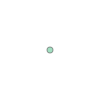

In [70]:
df.iloc[0,-1]

---

## Geo Data

#### Neighborhood polygon

In [14]:
# loads neighboorhood data

neighborhoods = gpd.read_file('./neighborhoods/d085e2f8d0b54d4590b1e7d1f35594c1pediacitiesnycneighborhoods.geojson.json')

In [15]:
# checks shape of data

neighborhoods.shape

(310, 5)

In [16]:
# looks at all brooklyn neighborhoods

neighborhoods[neighborhoods['borough'] == 'Brooklyn']

,neighborhood,boroughCode,borough,@id,geometry
7,Bath Beach,3,Brooklyn,http://nyc.pediacities.com/Resource/Neighborho...,"POLYGON ((-73.99381 40.60195, -73.99962 40.596..."
9,Bay Ridge,3,Brooklyn,http://nyc.pediacities.com/Resource/Neighborho...,"POLYGON ((-74.01475 40.63397, -74.01475 40.633..."
16,Bedford-Stuyvesant,3,Brooklyn,http://nyc.pediacities.com/Resource/Neighborho...,"POLYGON ((-73.94115 40.70028, -73.90548 40.680..."
20,Bensonhurst,3,Brooklyn,http://nyc.pediacities.com/Resource/Neighborho...,"POLYGON ((-73.97300 40.60883, -73.97299 40.608..."
21,Bergen Beach,3,Brooklyn,http://nyc.pediacities.com/Resource/Neighborho...,"POLYGON ((-73.91732 40.63101, -73.90396 40.624..."
...,...,...,...,...,...
270,South Slope,3,Brooklyn,http://nyc.pediacities.com/Resource/Neighborho...,"POLYGON ((-73.97686 40.66461, -73.97685 40.664..."
278,Sunset Park,3,Brooklyn,http://nyc.pediacities.com/Resource/Neighborho...,"POLYGON ((-73.99280 40.66553, -73.99300 40.665..."
293,Vinegar Hill,3,Brooklyn,http://nyc.pediacities.com/Resource/Neighborho...,"POLYGON ((-73.97905 40.70597, -73.97906 40.705..."
303,Williamsburg,4,Brooklyn,http://nyc.pediacities.com/Resource/Neighborho...,"POLYGON ((-73.95757 40.72510, -73.95300 40.722..."


In [17]:
# Geo location  polygon for Astoria queens

astoria =  neighborhoods[neighborhoods['neighborhood'] == 'Astoria']
astoria

,neighborhood,boroughCode,borough,@id,geometry
6,Astoria,4,Queens,http://nyc.pediacities.com/Resource/Neighborho...,"POLYGON ((-73.90160 40.76777, -73.90270 40.766..."


In [18]:
astoria['geometry']

6    POLYGON ((-73.90160 40.76777, -73.90270 40.766...
Name: geometry, dtype: geometry

In [19]:
#df['CRASH TIME'].splt(:)

In [20]:
# Hospitals 

# wrong gps locations going to update

#hospitals = gpd.read_file("./hospitals/nyu_2451_34494.shp")
#hospitals.crs = {'init': 'epsg:4326'}
#hospitals.head(2)

## Geo calculation stuffs

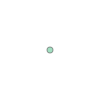

In [21]:
# test points 

p1 = Point(24.952242, 60.1696017)
p1

In [22]:
# Test sample of point

a = df.iloc[0,-1]
type(a)

shapely.geometry.point.Point

In [23]:
# test of polygon

b = astoria.geometry.iloc[0]
type(b)

shapely.geometry.polygon.Polygon

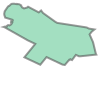

In [24]:
b

In [25]:
# Checks intercept of polygon, using the command - contains - 

b.contains(a)

False

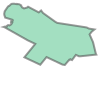

In [57]:
poly

In [56]:
# apply the contains method to to polygon and points 

poly = astoria.geometry.iloc[0]
print(type(poly)) 
print()
for i, j in df.iterrows():
    if (poly.contains(j['geometry'])):
        print(i)
    


<class 'shapely.geometry.polygon.Polygon'>

110
246
275
369
382
542
562
577
644
933
1007
1028
1046
1267
1393
1401
1542
1599
1600
1649
1831
1918
2124
2140
2282
2358
2416
2499
2594
2621
2650
2805
2813
2911
2930
2992
3011
3283
3299
3367
3450
3495
3552
3708
3914
3925
3933
4017
4199
4256
4271
4361
4488
4548
4624
4677
4740
4884
4927
4928
5167
5173
5184
5428
5463
5591
5598
5797
6047
6140
6187
6195
6310
6340
6642
6712
6858
6955
7054
7114
7146
7167
7266
7311
7380
7432
7518
7618
7636
7642
7655
7678
7714
7829
7891
7987
8089
8127
8172
8531
8569
8669
8906
8937
8982
9332
9472
9740
9809
9827
9832
9837
9851
9942
10000
10041
10150
10151
10167
10195
10237
10250
10420
10426
10431
10673
10729
10750
11019
11150
11354
11358
11560
11589
11776
11810
11908
12005
12174
12218
12256
12294
12332
12347
12475
12655
12674
12865
12968
13102
13146
13148
13300
13309
13413
13483
13573
13579
13581
13697
13965
14313
14451
14631
14761
14762
14764
14783
14809
14961
14976
15022
15126
15333
15370
15448
15530
15710
15857
15879


In [58]:
project_cord = [(40.762527, -74.000250), 
                (40.756137, -73.983123), (40.747258, -73.989501),(40.754414, -74.006391)]

In [59]:
proj_poly = Polygon(project_cord)

In [60]:
type(proj_poly)

shapely.geometry.polygon.Polygon

In [61]:
nyc_point = Point(40.756513, -73.993981)

In [62]:
proj_poly.contains(nyc_point)

True

In [84]:
df['CONTRIBUTING FACTOR VEHICLE 1'].value_counts()

Driver Inattention/Distraction                           614
Unspecified                                              430
Passing or Lane Usage Improper                           278
Following Too Closely                                    217
Passing Too Closely                                      208
Unsafe Lane Changing                                     183
Failure to Yield Right-of-Way                            148
Turning Improperly                                       134
Oversized Vehicle                                         71
Backing Unsafely                                          71
Traffic Control Disregarded                               31
Other Vehicular                                           27
Passenger Distraction                                     24
Reaction to Uninvolved Vehicle                            22
Pedestrian/Bicyclist/Other Pedestrian Error/Confusion     18
Driver Inexperience                                       15
View Obstructed/Limited 

In [55]:

for i, j in df.iterrows():
    if (proj_poly.contains(j.geometry)):
        print(i)

### MAP test

In [90]:
# map with dots that we can color code


m_1 = folium.Map(location=[40.734603, -73.9903599], tiles='cartodbpositron', zoom_start=10.5)

def color_producer(val):
    if val <= 12:
        return 'forestgreen'
    else:
        return 'darkred'

    
    
    
    
# Add a bubble map to the base map
for i in range(0,len(df)):
    Circle(
        location=[df.iloc[i]['LATITUDE'], df.iloc[i]['LONGITUDE']],
        radius=20,
        color='forestgreen').add_to(m_1) #df.iloc[i]['CRASH TIME'])

m_1


In [86]:
# Map that clusters the crashes 

def color_producer(val):
    if val == 'Driver Inattention/Distraction':
        return 'darkred'
    if val == 'Passenger Distraction':
        return 'orange'
    if val == 'Passing or Lane Usage Improper':
        return 'blue'
    if val == 'Following Too Closely':
        return 'pink'
    else:
        return 'forestgreen'




m_2 = folium.Map(location=[40.758017, -73.998543], tiles='cartodbpositron', zoom_start=14.5)

mc = MarkerCluster()
for idx, row in df.iterrows():
    #if not math.isnan(row['Long']) and not math.isnan(row['Lat']):
    mc.add_child(Marker([row['LATITUDE'], row['LONGITUDE']]))
m_2.add_child(mc)

for i in range(0,len(df)):
    Circle(
        location=[df.iloc[i]['LATITUDE'], df.iloc[i]['LONGITUDE']],
        radius=10,
        color=color_producer(df.iloc[i]['CONTRIBUTING FACTOR VEHICLE 1'])).add_to(m_2)

m_2

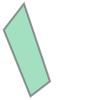

In [25]:
# Putting GPS into poly

from shapely.geometry import Point, Polygon
# Create a Polygon
name = 'NYC Random'
coords = [(40.759065, -73.972547), (40.766538, -73.966819), (40.756557, -73.937058), (40.748790, -73.947085)]
poly = Polygon(coords)
poly

---

In [ ]:
(40.761924, -74.000943), (40.758438, -73.992607), (40.754668, -73.995435), (40.757133, -74.004610)

In [76]:
df

,date,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,CONTRIBUTING FACTOR VEHICLE 1,geometry
9772,2020-01-24,01/24/2020,8:48,NaN,NaN,40.831043,-73.880710,"(40.831043, -73.88071)",Driver Inattention/Distraction,POINT (-73.88070999999999 40.831043)
10359,2020-01-25,01/25/2020,19:15,BRONX,10469.0,40.871563,-73.851746,"(40.871563, -73.851746)",Unspecified,POINT (-73.85174599999999 40.871563)
16626,2020-02-08,02/08/2020,1:40,NaN,NaN,40.762093,-73.756910,"(40.762093, -73.75691)",Pavement Slippery,POINT (-73.75690999999999 40.762093)
62139,2020-08-05,08/05/2020,11:29,MANHATTAN,10030.0,40.814010,-73.944660,"(40.81401, -73.94466)",Turning Improperly,POINT (-73.94466 40.81401)
27667,2020-03-05,03/05/2020,21:45,NaN,NaN,40.690357,-73.841090,"(40.690357, -73.84109)",Traffic Control Disregarded,POINT (-73.84109000000001 40.690357)
...,...,...,...,...,...,...,...,...,...,...
52507,2020-07-02,07/02/2020,8:46,BRONX,10468.0,40.861770,-73.898680,"(40.86177, -73.89868)",Unspecified,POINT (-73.89868 40.86177)
27516,2020-03-04,03/04/2020,18:26,BRONX,10455.0,40.816418,-73.918980,"(40.816418, -73.91898)",Unspecified,POINT (-73.91898 40.816418)
24266,2020-02-27,02/27/2020,14:33,QUEENS,11693.0,40.607800,-73.819320,"(40.6078, -73.81932)",Driver Inattention/Distraction,POINT (-73.81931999999999 40.6078)
6128,2020-01-16,01/16/2020,12:13,QUEENS,11413.0,40.665485,-73.753740,"(40.665485, -73.75374)",Reaction to Uninvolved Vehicle,POINT (-73.75374000000001 40.665485)


In [77]:
astoria =  { "type": "Feature", "properties": { "neighborhood": "Astoria", "boroughCode": "4", "borough": "Queens", "@id": "http:\/\/nyc.pediacities.com\/Resource\/Neighborhood\/Astoria" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.901603050647381, 40.76777029715587 ], [ -73.902696381322897, 40.766889286534429 ], [ -73.903569, 40.76578 ], [ -73.902184, 40.76267 ], [ -73.90108, 40.758122 ], [ -73.900866256516622, 40.757673593458776 ], [ -73.90737, 40.75698800000022 ], [ -73.907828, 40.756999000000249 ], [ -73.90907, 40.757565000000184 ], [ -73.910618, 40.755476000000172 ], [ -73.911294, 40.755814000000257 ], [ -73.911568, 40.755480000000148 ], [ -73.911764, 40.755573000000211 ], [ -73.913519212221317, 40.753495965965669 ], [ -73.914467, 40.753661 ], [ -73.920865, 40.756678 ], [ -73.923372, 40.753594 ], [ -73.929751, 40.756581 ], [ -73.92538, 40.76197 ], [ -73.928425, 40.763416 ], [ -73.93779, 40.7687 ], [ -73.93806383243512, 40.768771395253452 ], [ -73.937576325173325, 40.768923994184931 ], [ -73.936814606547301, 40.768903947478414 ], [ -73.936814549235208, 40.768904133836244 ], [ -73.936685391194146, 40.76913305469089 ], [ -73.936707379891928, 40.769252609074108 ], [ -73.936403817362134, 40.769474884014301 ], [ -73.936169139195655, 40.7695161146545 ], [ -73.93574021432643, 40.769367229866475 ], [ -73.935739008950634, 40.769368192359138 ], [ -73.935733075943389, 40.76936722986683 ], [ -73.935240168311893, 40.769679325462953 ], [ -73.934895338945594, 40.770041862889499 ], [ -73.93469499066984, 40.770425338525115 ], [ -73.935147154026012, 40.770541956058402 ], [ -73.935008138722253, 40.771162394866536 ], [ -73.934940272005008, 40.771164020932744 ], [ -73.934904812826517, 40.771270641186661 ], [ -73.934527301094533, 40.771176775103328 ], [ -73.934485483039069, 40.771306523218435 ], [ -73.934857909749041, 40.771382912969109 ], [ -73.934870181634281, 40.771353610688053 ], [ -73.934953987149896, 40.771372943016843 ], [ -73.934929433198675, 40.771440236090079 ], [ -73.934837152998128, 40.771420135309732 ], [ -73.934842826975185, 40.771395793192305 ], [ -73.934480150890622, 40.771323068200346 ], [ -73.934479916675571, 40.771323794916015 ], [ -73.934435257431787, 40.771462362333402 ], [ -73.934826227617009, 40.771576958073268 ], [ -73.934799675058713, 40.771734138890096 ], [ -73.9374592469878, 40.772531495125364 ], [ -73.937806221312186, 40.773562894648123 ], [ -73.937858118227766, 40.774087568973023 ], [ -73.937647692525204, 40.775085685383942 ], [ -73.936380228175423, 40.77692145656264 ], [ -73.936089196991006, 40.777184322077026 ], [ -73.935854526415042, 40.777211684624177 ], [ -73.93508232492151, 40.777944233727773 ], [ -73.934743530112868, 40.778076335377023 ], [ -73.933904413486019, 40.778116665974281 ], [ -73.932774778676674, 40.777922388777903 ], [ -73.932722104539678, 40.778034767117958 ], [ -73.931788343051679, 40.777870607104916 ], [ -73.931049642989578, 40.777441897312087 ], [ -73.931073771467638, 40.777260594398257 ], [ -73.930628565541824, 40.776590902749632 ], [ -73.92988058500103, 40.776221631901947 ], [ -73.929876093378581, 40.776222938582578 ], [ -73.929873446617734, 40.776221631902132 ], [ -73.928598011850681, 40.776592675101142 ], [ -73.928277308327182, 40.7768989753244 ], [ -73.923976023757618, 40.774621998674348 ], [ -73.923035613431495, 40.775387278507253 ], [ -73.922323164184647, 40.774414625567033 ], [ -73.917261836015726, 40.77078466951928 ], [ -73.916563398809217, 40.770404609262215 ], [ -73.905604677955537, 40.768716808251995 ], [ -73.904666914228073, 40.768544567933368 ], [ -73.903905667125684, 40.768139880759733 ], [ -73.901603050647381, 40.76777029715587 ] ] ] } }

In [78]:
type(astoria)

dict

In [79]:
 from geojson import Feature, Point, FeatureCollection

ModuleNotFoundError: No module named 'geojson'

In [ ]:
gpd.GeoDataFrame(astoria)

In [80]:
geo =  gpd.GeoSeries(astoria)

<ipython-input-80-1883d8ab72d4>:1: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  geo =  gpd.GeoSeries(astoria)


In [57]:
geo

type                                                    Feature
properties    {'neighborhood': 'Astoria', 'boroughCode': '4'...
geometry      {'type': 'Polygon', 'coordinates': [[[-73.9016...
dtype: object

In [55]:
df = gpd.read_file(astoria)

AttributeError: 'dict' object has no attribute 'startswith'

In [40]:
from shapely.geometry import shape

In [54]:
geom = [shape(i) for i in astoria]

AttributeError: 'str' object has no attribute 'get'

In [ ]:


import geopandas as gpd

fname = "./data/2013-04-29-Running.geojson"

df = gpd.read_file(fname)

print(type(df))


In [52]:
gpd.GeoDataFrame({'geometry':geom})

NameError: name 'geom' is not defined

In [46]:
astoria2 =  astoria["geometry"]['coordinates']